# Parkinson’s disease

Parkinson’s disease is a progressive disorder that affects the nervous system and the parts of the body controlled by the nerves. Symptoms start slowly. The first symptom may be a barely noticeable tremor in just one hand. Tremors are common, but the disorder may also cause stiffness or slowing of movement. Although Parkinson’s disease can’t be cured, medications might significantly improve your symptoms. Occasionally, your health care provider may suggest surgery to regulate certain regions of your brain and improve your symptoms.

# Citation for the dataset
Citation:
'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection',
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM.
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Z score scalar
from sklearn.model_selection import train_test_split

# models

# logistic regression
from sklearn.linear_model import LogisticRegression
# decision tree
from sklearn.tree import DecisionTreeClassifier
# random forest
from sklearn.ensemble import RandomForestClassifier
# xgboost
from xgboost import XGBClassifier
# PCA
from sklearn.decomposition import PCA
# support vector machine
from sklearn import svm 

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix

# saving the model
import pickle


In [2]:
df = pd.read_csv("parkinsons.csv")


    Data Set Characteristics: Multivariate
    Number of Instances: 197
    Area: Life
    Attribute Characteristics: Real
    Number of Attributes: 23
    Date Donated: 2008-06-26
    Associated Tasks: Classification
    Missing Values? N/A


-----------------------------------------------------

# Attribute Information:

Matrix column entries (attributes):

    name - ASCII subject name and recording number
    MDVP:Fo(Hz) - Average vocal fundamental frequency
    MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
    MDVP:Flo(Hz) - Minimum vocal fundamental frequency
    MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
    measures of variation in fundamental frequency
    MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
    NHR,HNR - Two measures of ratio of noise to tonal components in the voice
    status - Health status of the subject (one) - Parkinson's, (zero) - healthy
    RPDE,D2 - Two nonlinear dynamical complexity measures
    DFA - Signal fractal scaling exponent
    spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

-----------------------------------------------------



In [3]:
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

No missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

1. **MDVP:Fo(Hz) - Average vocal fundamental frequency:**
   - This attribute represents the average (mean) frequency of the vocal fundamental tone in Hertz (Hz). It's a measure of the average pitch of a person's voice.

2. **MDVP:Fhi(Hz) - Maximum vocal fundamental frequency:**
   - This attribute represents the maximum vocal fundamental frequency in Hertz. It indicates the highest pitch reached during vocalization.

3. **MDVP:Flo(Hz) - Minimum vocal fundamental frequency:**
   - This attribute represents the minimum vocal fundamental frequency in Hertz. It indicates the lowest pitch reached during vocalization.

4. **MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP:**
   - These attributes are measures of variation in the fundamental frequency (pitch) of the voice.
   - MDVP:Jitter(%) is the percentage of variation in pitch.
   - MDVP:Jitter(Abs) is the absolute difference in pitch between consecutive periods.
   - MDVP:RAP is the relative average perturbation, a measure of pitch variation.
   - MDVP:PPQ is the five-point period perturbation quotient.
   - Jitter:DDP is the average absolute difference of differences between consecutive periods.

5. **MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA:**
   - These attributes are measures of variation in amplitude (intensity) of the voice.
   - MDVP:Shimmer represents the overall variation in amplitude.
   - MDVP:Shimmer(dB) is the shimmer in decibels, a measure of amplitude variation in dB.
   - Shimmer:APQ3 and Shimmer:APQ5 are amplitude perturbation quotients.
   - MDVP:APQ is the 11-point amplitude perturbation quotient.
   - Shimmer:DDA is the average absolute differences between consecutive amplitude peaks.

6. **NHR - Noise-to-Harmonics Ratio:**
   - NHR is a measure of the ratio of noise to tonal components in the voice. It quantifies the noisiness of the voice.

7. **HNR - Harmonic-to-Noise Ratio:**
   - HNR is another measure of the ratio of harmonics (tonal components) to noise in the voice. It is used to assess voice quality.

8. **Status - Health status of the subject:**
   - This attribute is a binary variable indicating the health status of the subject. '1' typically represents individuals with Parkinson's disease, and '0' represents healthy individuals.

9. **RPDE, D2 - Two nonlinear dynamical complexity measures:**
   - RPDE and D2 are measures of nonlinear dynamical complexity in the voice signal. They provide insights into the complexity and irregularity of the voice.

10. **DFA - Signal fractal scaling exponent:**
    - DFA is a measure of the fractal scaling properties of the voice signal. It characterizes the self-similarity and long-range correlations in the signal.

11. **Spread1, Spread2, PPE - Three nonlinear measures of fundamental frequency variation:**
    - These attributes are nonlinear measures of variation in the fundamental frequency of the voice signal. They provide additional insights into pitch dynamics.

These attributes are commonly used in voice analysis, particularly in the diagnosis and monitoring of Parkinson's disease. Researchers and healthcare professionals use them to assess vocal characteristics and detect potential indicators of the disease.

In [6]:
df.shape

(195, 24)

So we have 24 attributes and 195 data points

In [7]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
df['name'].is_unique

True

In [10]:
# name is although unique but not useful for model training 
# drop name

df.drop(['name'], axis=1, inplace=True)


In [11]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
# lets take a look at status

df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [13]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [14]:
df.groupby('status').median()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,198.996,231.1615,113.9385,0.003355,0.000025,0.001625,0.001775,0.004875,0.016705,0.154,...,0.013015,0.02633,0.004825,24.997,0.435368,0.682527,-6.826448,0.167356,2.129510,0.115118
1,145.174,163.3350,99.7700,0.005440,0.000040,0.002840,0.003140,0.008530,0.028380,0.263,...,0.021570,0.04451,0.016580,21.414,0.530529,0.726652,-5.440040,0.240875,2.439597,0.222716


In [15]:
df.groupby('status').quantile(0.25) # Q1


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,120.9475,139.41325,98.24375,0.002655,0.00001,0.001332,0.00148,0.003998,0.014475,0.129,...,0.011235,0.02206,0.004188,22.99325,0.372126,0.654291,-7.257665,0.120623,1.974217,0.094658
1,117.5720,133.77650,80.87550,0.004005,0.00003,0.002030,0.00219,0.006085,0.018295,0.168,...,0.015555,0.02740,0.008445,18.78200,0.439064,0.685569,-6.038300,0.199507,2.180933,0.170103


In [16]:
df.groupby('status').quantile(0.75) # Q3


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,229.077,251.23925,199.183,0.00453,0.00003,0.001908,0.002228,0.005725,0.020210,0.18925,...,0.015945,0.034540,0.009213,26.13925,0.507748,0.742284,-6.350146,0.193766,2.339487,0.147761
1,170.071,207.16050,129.240,0.00767,0.00006,0.004100,0.004360,0.012300,0.042525,0.39450,...,0.034825,0.068455,0.027960,24.16450,0.604573,0.764868,-4.664067,0.303660,2.668479,0.274397


In [17]:
df.groupby('status').min()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,110.739,113.597,74.287,0.00178,0.000007,0.00092,0.00106,0.00276,0.00954,0.085,...,0.00719,0.01403,0.00065,17.883,0.256570,0.626710,-7.964984,0.006274,1.423287,0.044539
1,88.333,102.145,65.476,0.00168,0.000010,0.00068,0.00092,0.00204,0.01022,0.090,...,0.00811,0.01364,0.00231,8.441,0.263654,0.574282,-7.120925,0.063412,1.765957,0.093193


In [18]:
df.groupby('status').max()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,260.105,592.030,239.17,0.01360,0.00008,0.00624,0.00564,0.01873,0.04087,0.405,...,0.02745,0.07008,0.10715,33.047,0.663842,0.785714,-5.198864,0.291954,2.882450,0.252404
1,223.361,588.518,199.02,0.03316,0.00026,0.02144,0.01958,0.06433,0.11908,1.302,...,0.13778,0.16942,0.31482,29.928,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [19]:
# lets see if we can find any co-relation in the features

df.corr() # by default takes pearson correlation method


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<AxesSubplot:>

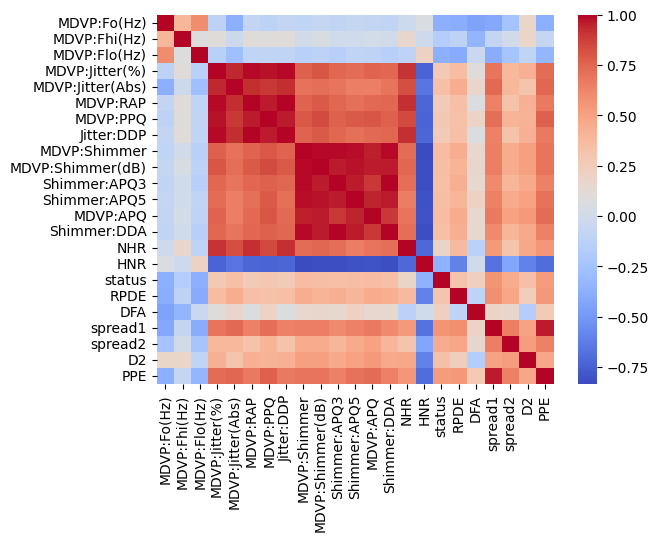

In [20]:
sns.heatmap(df.corr(),cmap="coolwarm")

In [21]:
correlation_matrix_spearman = df.corr(method='spearman')

<AxesSubplot:>

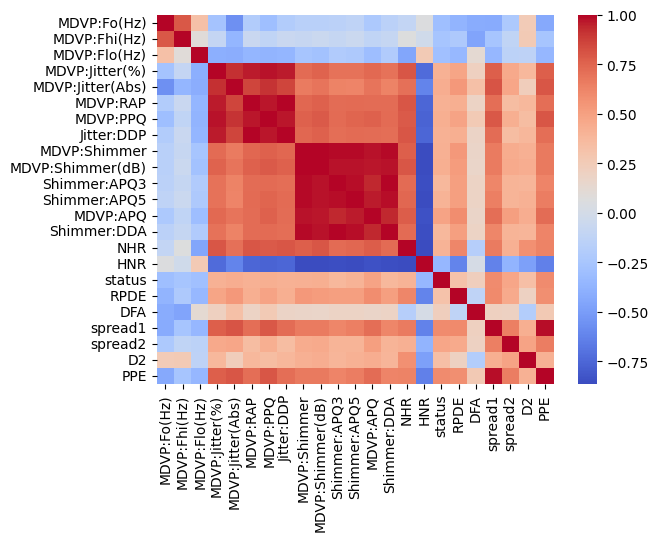

In [22]:
sns.heatmap(correlation_matrix_spearman,cmap="coolwarm")

# Removing Highly Co-related data

Removing highly correlated variables, also known as feature selection or dimensionality reduction, can be beneficial for several reasons in data analysis and modeling:

1. **Improved Model Performance:** Highly correlated variables can introduce multicollinearity into predictive models like linear regression. Multicollinearity can make it challenging for the model to estimate the individual effects of each variable, leading to unstable and less interpretable coefficient estimates. By removing correlated variables, you can often create a more stable and accurate model.

2. **Reduced Overfitting:** When you have many highly correlated features, your model may become overly complex, potentially overfitting the training data. Removing redundant features can lead to a simpler and more generalizable model that performs better on unseen data.

3. **Interpretability:** Highly correlated variables can make it difficult to interpret the impact of individual features on the target variable. Simplifying the model by removing correlated features can enhance interpretability, which is crucial in many applications.

4. **Computational Efficiency:** Training models with a large number of features, especially highly correlated ones, can be computationally expensive. Reducing the number of features can improve the training and prediction times of your models.

5. **Noise Reduction:** Highly correlated features may introduce noise into your model. By eliminating redundant information, you can reduce the potential for noise and focus on the most informative features.

6. **Avoidance of the "Curse of Dimensionality":** In high-dimensional spaces, the number of features can grow rapidly. This can lead to a sparsity problem, where you have relatively few data points compared to the number of features. Removing correlated features can help mitigate the curse of dimensionality and improve the reliability of your models.


In [23]:
# remove highly correlated data

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Define a threshold for correlation (e.g., 0.90 or -0.90)
threshold = 0.90

# Find highly correlated pairs of columns
highly_correlated = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)



In [24]:
# Create a list of columns to drop
columns_to_drop = set()



In [25]:
# Iterate through the columns
for col in highly_correlated:
    correlated_cols = list(correlation_matrix.index[highly_correlated[col]])
    for correlated_col in correlated_cols:
        if correlated_col != col and col not in columns_to_drop:
            columns_to_drop.add(correlated_col)



In [26]:
columns_to_drop # saved to DroppedColumns.txt for high correlated data

{'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'NHR',
 'PPE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA'}

In [27]:
# Drop the highly correlated columns from the original DataFrame
df_filtered = df.drop(columns=columns_to_drop)


In [28]:
df_filtered.shape

(195, 12)

In [29]:
df_filtered.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,status,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180


<AxesSubplot:>

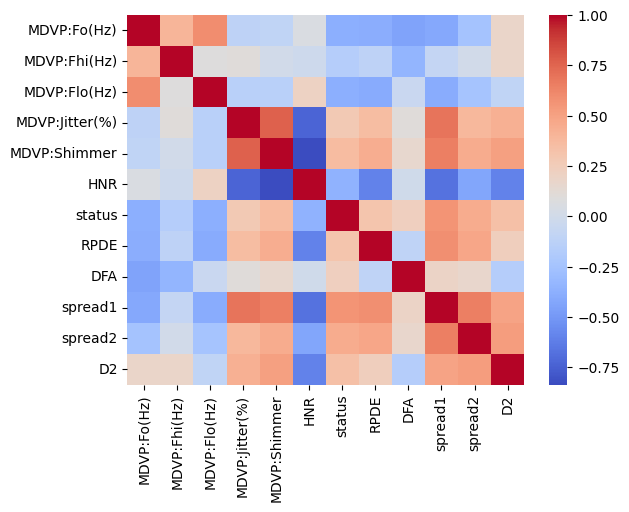

In [30]:
sns.heatmap(df_filtered.corr(),cmap="coolwarm")

In [31]:
Y=df_filtered["status"]
X=df_filtered.drop(["status"],axis=1)


In [32]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180


In [33]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

# Split the data into Train and Test set

In [34]:
# split train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [62]:
# select random input data from X

input_data =X.sample(n=4)


In [63]:
input_data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
42,237.226,247.326,225.227,0.00298,0.01752,22.736,0.305062,0.654172,-7.310550,0.098648,2.416838
95,157.447,163.267,149.605,0.00369,0.03272,21.693,0.447285,0.705658,-6.247076,0.180528,2.344348
37,176.170,185.604,163.564,0.00369,0.01851,24.951,0.341435,0.783626,-6.006414,0.196371,2.536527
155,117.870,127.349,95.654,0.00647,0.03087,22.431,0.628300,0.652025,-3.583722,0.207914,2.439597


In [35]:
X_train.shape,X_test.shape

((156, 11), (39, 11))

# Data Standardization

In [36]:
scalar = StandardScaler()
scalar.fit(X_train)

StandardScaler()

In [37]:
X_train=scalar.transform(X_train)
X_test=scalar.transform(X_test)

In [38]:
# Save the scaler model to a file using pickle
with open('standard_scaler_model.pkl', 'wb') as file:
    pickle.dump(scalar, file)


# to load

# with open('standard_scaler_model.pkl', 'rb') as file:
#     loaded_scaler = pickle.load(file)


In [39]:
X_train

array([[ 0.40963029,  0.16686345, -0.97815472, ..., -0.45235478,
        -0.02807364,  0.57414174],
       [-1.40490164, -0.99217672, -0.77285996, ...,  1.17819943,
        -0.86910869,  0.72549313],
       [-0.91377818, -0.7552021 , -0.21547182, ..., -0.29632683,
        -1.41074042, -0.99967108],
       ...,
       [-0.89348622, -0.81467256, -0.26820265, ...,  0.07602809,
        -0.43809315, -0.93911385],
       [-0.8988619 , -0.57575552, -0.42163251, ..., -0.29227214,
         0.00760899, -1.35418743],
       [-0.38584831,  0.11113824, -0.79952162, ...,  0.26349019,
        -0.80802285, -0.76905641]])

In [40]:
X_test

array([[-1.50665200e+00, -9.08350466e-01, -7.32252210e-01,
        -1.44415666e-01, -9.64638290e-02, -1.38596773e-01,
         8.35028961e-01,  1.28917080e+00,  6.92689410e-01,
         1.59404490e+00,  7.16122614e-01],
       [ 1.17878746e+00,  4.36649770e-01, -7.33619474e-01,
        -5.12357204e-01, -5.06789582e-01, -7.76030748e-01,
         3.84172075e-01, -1.58558064e+00, -1.85676430e-01,
        -1.80788245e-01,  2.54107690e-01],
       [ 1.18796484e+00,  2.04234585e-01,  1.77139131e+00,
        -9.27914706e-01, -1.07146304e+00,  2.58060727e+00,
        -1.48487036e+00,  3.79021929e-01, -2.11971476e+00,
        -7.69599032e-01, -2.56393045e+00],
       [-1.00678702e+00, -7.04769094e-01, -2.89645918e-01,
        -5.44822634e-01, -8.54071909e-01,  1.03529154e+00,
        -7.86703867e-01,  6.45139022e-01, -5.83337604e-01,
        -1.15425214e-01, -4.92019642e-01],
       [-7.68199132e-01, -5.27090465e-01, -1.04974066e-01,
         7.81931265e-01,  1.74157815e+00, -6.82998580e-01,
  

In [67]:
def Model_Evaluation(Y_true,Y_pred):
    CM= confusion_matrix(Y_true,Y_pred)
    TN=CM[0][0]
    FN=CM[1][0]
    TP=CM[1][1]
    FP=CM[0][1]

    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_score=2*(Recall * Precision) / (Recall + Precision)
    print("True Positive", TP)
    print("False Positive", FP)
    print("True Negative", TN)
    print("False Negative", FN)
    print("Accuracy: ",Accuracy)
    print("Precision: ",Precision)
    print("Recall: ",Recall)
    print("F1_score: ",F1_score)
    print("confusion matrix\n",CM)


def save_model(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

def load_model(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# SVM (Support Vector Machine) Classifier Model

Model training

In [42]:
model= svm.SVC(kernel="linear") # Support vector classifier 

In [43]:
model.fit (X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [44]:
Y_pred=model.predict(X_train)


In [45]:
Y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [46]:
training_data_accuracy = accuracy_score(Y_train,Y_pred)
print("accuracy_score of training data= ",training_data_accuracy)

accuracy_score of training data=  0.9038461538461539


In [47]:
Y_pred_test=model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,Y_pred_test)
print("accuracy_score of testing data= ",test_data_accuracy)

accuracy_score of testing data=  0.8717948717948718


In [51]:
Model_Evaluation(Y_train,Y_pred)

True Positive 119
False Positive 14
True Negative 22
False Negative 1
Accuracy:  0.9038461538461539
Precision:  0.8947368421052632
Recall:  0.9916666666666667
F1_score:  0.9407114624505929
confusion matrix
 [[ 22  14]
 [  1 119]]


In [52]:
Model_Evaluation(Y_test,Y_pred_test)


True Positive 27
False Positive 5
True Negative 7
False Negative 0
Accuracy:  0.8717948717948718
Precision:  0.84375
Recall:  1.0
F1_score:  0.9152542372881356
confusion matrix
 [[ 7  5]
 [ 0 27]]


In [65]:
# save svm model

save_model(model,"SVM_Classifier_Model.pkl")

Building a predictive system

In [80]:
input_data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
42,237.226,247.326,225.227,0.00298,0.01752,22.736,0.305062,0.654172,-7.310550,0.098648,2.416838
95,157.447,163.267,149.605,0.00369,0.03272,21.693,0.447285,0.705658,-6.247076,0.180528,2.344348
37,176.170,185.604,163.564,0.00369,0.01851,24.951,0.341435,0.783626,-6.006414,0.196371,2.536527
155,117.870,127.349,95.654,0.00647,0.03087,22.431,0.628300,0.652025,-3.583722,0.207914,2.439597


In [68]:
# load model
StandardScalerModel= load_model("standard_scaler_model.pkl")
SVMModel= load_model("SVM_Classifier_Model.pkl")

In [69]:
# change input_data to numpy array
inp_data= np.asarray(input_data)

In [70]:
inp_data

array([[ 2.372260e+02,  2.473260e+02,  2.252270e+02,  2.980000e-03,
         1.752000e-02,  2.273600e+01,  3.050620e-01,  6.541720e-01,
        -7.310550e+00,  9.864800e-02,  2.416838e+00],
       [ 1.574470e+02,  1.632670e+02,  1.496050e+02,  3.690000e-03,
         3.272000e-02,  2.169300e+01,  4.472850e-01,  7.056580e-01,
        -6.247076e+00,  1.805280e-01,  2.344348e+00],
       [ 1.761700e+02,  1.856040e+02,  1.635640e+02,  3.690000e-03,
         1.851000e-02,  2.495100e+01,  3.414350e-01,  7.836260e-01,
        -6.006414e+00,  1.963710e-01,  2.536527e+00],
       [ 1.178700e+02,  1.273490e+02,  9.565400e+01,  6.470000e-03,
         3.087000e-02,  2.243100e+01,  6.283000e-01,  6.520250e-01,
        -3.583722e+00,  2.079140e-01,  2.439597e+00]])

In [71]:
# reshape
inp_data_reshape= inp_data.reshape(4,-4)

In [72]:
inp_data_reshape

array([[ 2.372260e+02,  2.473260e+02,  2.252270e+02,  2.980000e-03,
         1.752000e-02,  2.273600e+01,  3.050620e-01,  6.541720e-01,
        -7.310550e+00,  9.864800e-02,  2.416838e+00],
       [ 1.574470e+02,  1.632670e+02,  1.496050e+02,  3.690000e-03,
         3.272000e-02,  2.169300e+01,  4.472850e-01,  7.056580e-01,
        -6.247076e+00,  1.805280e-01,  2.344348e+00],
       [ 1.761700e+02,  1.856040e+02,  1.635640e+02,  3.690000e-03,
         1.851000e-02,  2.495100e+01,  3.414350e-01,  7.836260e-01,
        -6.006414e+00,  1.963710e-01,  2.536527e+00],
       [ 1.178700e+02,  1.273490e+02,  9.565400e+01,  6.470000e-03,
         3.087000e-02,  2.243100e+01,  6.283000e-01,  6.520250e-01,
        -3.583722e+00,  2.079140e-01,  2.439597e+00]])

In [73]:
std_data= StandardScalerModel.transform(inp_data_reshape)

c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [74]:
pred = SVMModel.predict(std_data)

In [76]:
pred

array([0, 1, 1, 1], dtype=int64)